In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# now read the load the data and then read it
dataset = pd.read_csv('car data.csv')

dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# list names of all the columns
dataset.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
# check for null values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# find descriptive statistics
des_summary = dataset.describe(include = 'all')
des_summary

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [59]:
# find out top 5 most sold cars
import heapq
cars = dataset['Car_Name'].value_counts().nlargest(5)
cars

city             26
corolla altis    16
verna            14
fortuner         11
brio             10
Name: Car_Name, dtype: int64

In [61]:
# now plot a pie chart to show the cars with their frequency
fig = px.pie(names = cars.index, values = cars.values, title = "Top Five Sold Cars")
fig.update_traces(textinfo = 'percent + label')
fig.show()

In [67]:
# now also find the 5 least sold cars
least_cars = dataset['Car_Name'].value_counts().nsmallest(10)
least_cars

Bajaj  ct 100             1
Hero  Ignitor Disc        1
TVS Jupyter               1
Hero Honda Passion Pro    1
Hero Splender Plus        1
vitara brezza             1
Bajaj Discover 100        1
Suzuki Access 125         1
s cross                   1
alto 800                  1
Name: Car_Name, dtype: int64

In [68]:
# plot pie chart for least cars
fig = px.pie(names = least_cars.index, values = least_cars.values, title = 'Bottom Five Sold Cars')
fig.update_traces(textinfo = 'percent + label')
fig.show()

<Axes: xlabel='Selling_Price'>

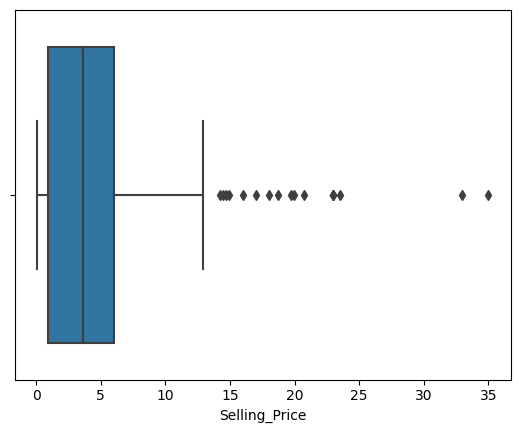

In [7]:
# identify outliers in selling price
outliers = sb.boxplot(x = dataset['Selling_Price'])
outliers

In [8]:
# find the range of outliers limit
data = dataset['Selling_Price']

# minimum and maximum in the data
min_value = np.min(data)
max_value = np.max(data)

# Calculate the interquartile range (IQR)
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find potential outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

# Print the results
print("Minimum number in the column is ", min_value)
print("Maximum number in the column is ", max_value)
print("First quarter or 25th percentile is ", Q1)
print("Second quarter or 50th percentile is ", Q2)
print("Third quater or 75th percentile is ", Q3)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:", outliers)

Minimum number in the column is  0.1
Maximum number in the column is  35.0
First quarter or 25th percentile is  0.9
Second quarter or 50th percentile is  3.6
Third quater or 75th percentile is  6.0
Lower Bound: -6.749999999999999
Upper Bound: 13.649999999999999
Potential Outliers: [14.9, 23.0, 18.0, 16.0, 19.99, 18.75, 23.5, 33.0, 19.75, 14.25, 14.5, 14.73, 23.0, 35.0, 23.0, 20.75, 17.0]


In [9]:
import plotly.graph_objects as go

# Sample data
data = dataset['Selling_Price']

# Create a box plot
fig = go.Figure()
fig.add_trace(go.Box(y=data))

# Update the layout for better visualization (optional)
fig.update_layout(title='Box Plot Example', yaxis_title='Values')

# Show the plot
fig.show()

In [50]:
# Sample data
data = dataset['Selling_Price']

colors = ['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'red', 'pink', 'yellow', 'green']

# Create a box plot
fig = go.Figure()
fig.add_trace(go.Histogram(x=data, marker = dict(color = colors), opacity = 0.7))



# Update the layout for better visualization
fig.update_layout(title='Histogram showing distribution of selling price', yaxis_title='Frequency', xaxis_title='Selling Price in Millions')

# Show the plot
fig.show()

In [12]:
# Sample data
data = dataset['Selling_Price']

# Create a box plot
fig = go.Figure()
fig.add_trace(go.Scatter(y=data, mode = 'markers'))

# Update the layout for better visualization
fig.update_layout(title='Histogram showing distribution of selling price', yaxis_title='Frequency', xaxis_title='Selling Price in Millions')

# Show the plot
fig.show()

In [13]:
# visualize data to check the distribution
year = dataset['Year']

colors = ['blue', 'green', 'yellow', 'red', 'pink', 'black', 'orange', 'gray', 'orange', 'black', 'pink', 'red', 'yellow', 'green', 'blue']

fig = go.Figure()
fig.add_trace(go.Histogram(x = year, marker = dict(color = colors), opacity = 0.3))
fig.update_layout(title = 'Number of Cars Sold in Each Year', xaxis_title = 'Years', yaxis_title = 'Number of Cars Sold')
fig.show()

In [69]:
# find number of cars sold in each year
sold_year = dataset['Year'].value_counts()
sold_year

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [70]:
# lets show the above distribution using pie chart
fig = px.pie(names = sold_year.index, values = sold_year.values, title = 'Cars Sold each Year')
fig.update_traces(textinfo = 'percent + label')
fig.show()

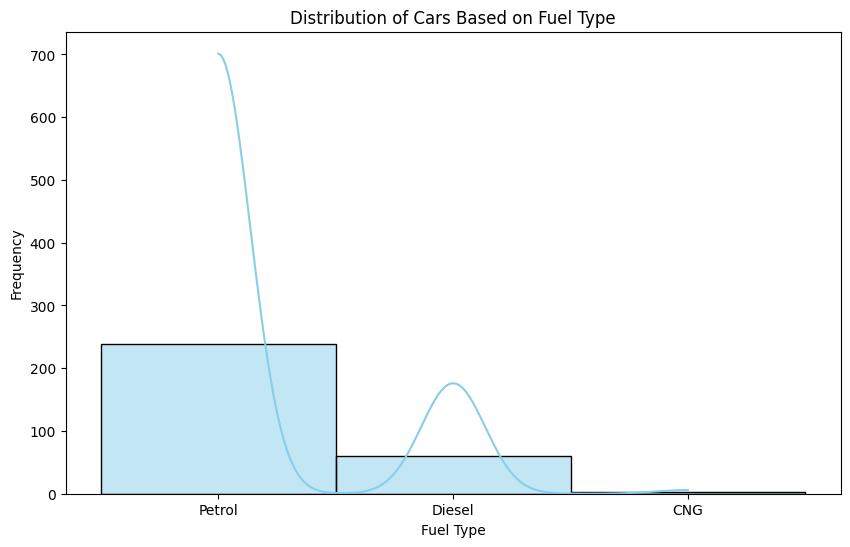

In [14]:
# visualize data to check the distribution
plt.figure(figsize=(10, 6))
sb.histplot(dataset['Fuel_Type'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Cars Based on Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.show()

In [75]:
# show the fuel ditribution using pie chart
fuel = dataset['Fuel_Type'].value_counts()

# plot a pie chart to show the distribution
colors = ['green', 'orange', 'black']
fig = px.pie(names = fuel.index, values = fuel.values, title = 'Cars with their Fuel Type')
fig.update_traces(textinfo = 'percent + label', marker = dict(colors = colors), opacity = 0.4)
fig.show()

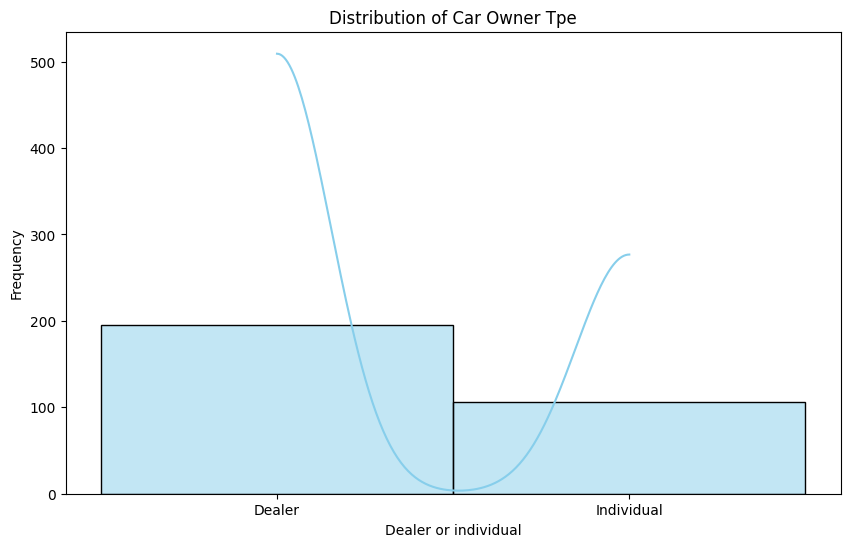

In [15]:
# visualize data to check the distribution
plt.figure(figsize=(10, 6))
sb.histplot(dataset['Seller_Type'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Car Owner Tpe')
plt.xlabel('Dealer or individual')
plt.ylabel('Frequency')
plt.show()

In [79]:
# plot a pie graph for dealer type
dealer = dataset['Seller_Type'].value_counts()

colors = ['cyan', 'yellow']
fig = px.pie(names = dealer.index, values = dealer.values, title = 'Dealer Types')
fig.update_traces(textinfo = 'percent + label', marker = dict(colors = colors), opacity = 0.6)
fig.show()

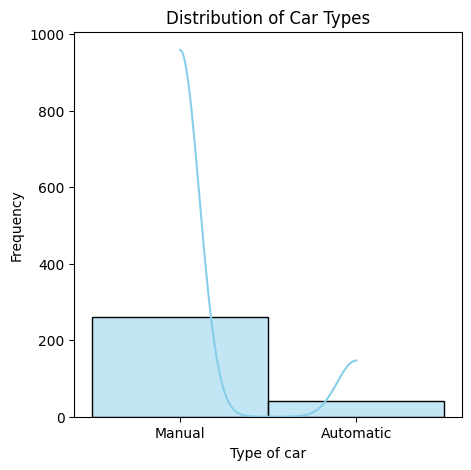

In [16]:
# visualize data to check the distribution
plt.figure(figsize=(5, 5))
sb.histplot(dataset['Transmission'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Car Types')
plt.xlabel('Type of car')
plt.ylabel('Frequency')
plt.show()

In [17]:
# find distribution of car types
fuel_type = dataset['Fuel_Type']

# define figure
fig = go.Figure()

# define dictaionary colors
colors = ['green', 'blue', 'purple']

fig.add_trace(go.Histogram(x = fuel_type, marker = dict(color = colors), opacity = 0.5))
fig.update_layout(title = 'Showing Number of Cars With Fuel Type', xaxis_title ='Fuel Type', yaxis_title = 'Number of Cars')
fig.show()

In [38]:
# visualize to find number of prevous employees
owner = dataset['Owner']
colors = ['orange', 'pink']
fig = go.Figure()
fig.add_trace(go.Histogram(x = owner, marker = dict(color = colors), opacity = 0.9))
fig.update_layout(title = 'Number of cars with Previous Owners', xaxis_title = 'Number of Owners', yaxis_title = 'Number of Cars')
fig.show()

In [19]:
# lets now find out data types of all the columns
dataset.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [20]:
# find unique values of all the object data types
print(dataset['Car_Name'].unique())
print(len(dataset['Car_Name'].unique()))

print(dataset['Fuel_Type'].unique())
print(len(dataset['Fuel_Type'].unique()))

print(dataset['Seller_Type'].unique())
print(len(dataset['Seller_Type'].unique()))

print(dataset['Transmission'].unique())
print(len(dataset['Transmission'].unique()))

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

In [21]:
# now convert all the object data types into float or int for visualization and prediction
final_data = pd.get_dummies(dataset, columns = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'])
print(final_data.head())
data_final = final_data

   Year  Selling_Price  Present_Price  Kms_Driven  Owner  Car_Name_800  \
0  2014           3.35           5.59       27000      0             0   
1  2013           4.75           9.54       43000      0             0   
2  2017           7.25           9.85        6900      0             0   
3  2011           2.85           4.15        5200      0             0   
4  2014           4.60           6.87       42450      0             0   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   Car_Name_Bajaj Avenger 150  ...  Car_Name_vitara brezza  Car_Name_wagon r  \
0                           0  ...                       0  

In [22]:
# move the last column to the end for easier prediction
column_remove = final_data.pop('Owner')

# now insert the column to the end
final_data.insert(len(final_data.columns), 'Owner', column_remove)

final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Owner
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [23]:
# now find general info
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 110 entries, Year to Owner
dtypes: float64(2), int64(3), uint8(105)
memory usage: 42.7 KB


In [24]:
# find descriptive statistics
des_summary = final_data.describe(include = 'all')
des_summary

,Year,Selling_Price,Present_Price,Kms_Driven,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,...,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.003322,0.006645,0.003322,0.003322,0.003322,0.003322,...,0.013289,0.009967,0.006645,0.199336,0.794020,0.647841,0.352159,0.132890,0.867110,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.057639,0.081378,0.057639,0.057639,0.057639,0.057639,...,0.114700,0.099500,0.081378,0.400166,0.405089,0.478439,0.478439,0.340021,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [25]:
## Find correlation of bought price and selling price
# pd.set_option('display.max_rows', None)

x = final_data['Present_Price']
y = final_data['Selling_Price']

# find correlation among the variables
corr_coef = np.corrcoef(x, y)[0, 1]

print("The correlation is ", corr_coef)

# display graph for the correlation
data = {'x': final_data['Present_Price'], 'y': final_data['Selling_Price']}
df = pd.DataFrame(data)
import plotly.express as px

fig = px.scatter(df, x = 'x', y = 'y', trendline='ols', labels={'x': 'Variable X', 'y': 'Variable Y'})

fig.update_layout(title = 'Relationship between Present Price and Selling Price', xaxis_title = 'Present Price', yaxis_title = 'Selling Price')
fig.show()

The correlation is  0.8789825451614951


In [26]:
# distribute the data into dependent and independent variables
x = final_data.iloc[:, : -1]
y = final_data.iloc[:, -1]

In [27]:
# now classify data into trainig and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

Minimum error:- 0.08196721311475409 at K = 1


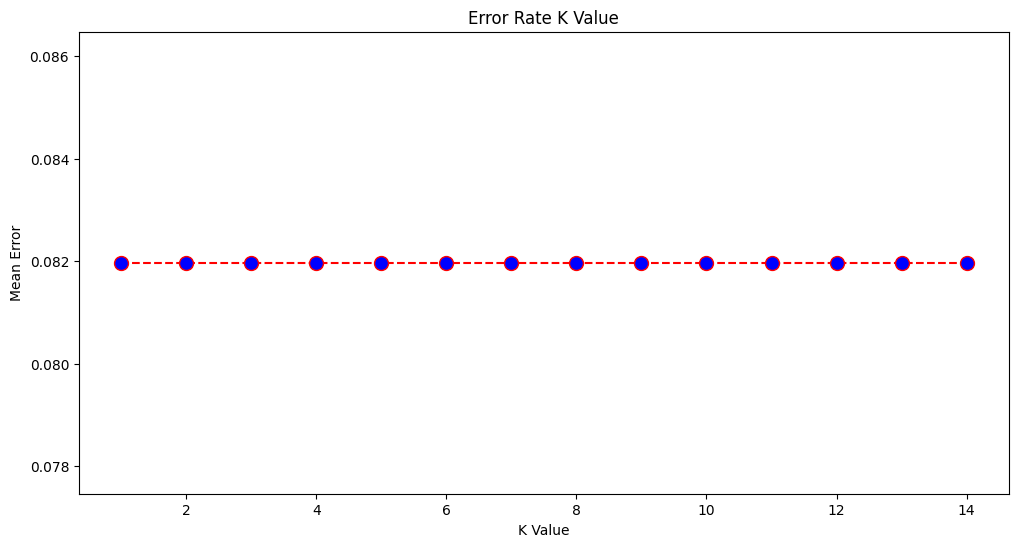

In [28]:
# as i am planning to apply KNN so i want to know how many neighbors would work efficiently
#checking for the best value of k
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
error = []
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",np.min(error),"at K =",error.index(np.min(error))+1)

In [29]:
# as the outcome is binary so apply KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

# Train the model
knn_model.fit(x_train, y_train)

# Make predictions on the testing set
predict = knn_model.predict(x_test)

In [30]:
# now evaluate using matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, predict)
recall = recall_score(y_test, predict, average='weighted')
precision = precision_score(y_test, predict, average='weighted')
f1 = f1_score(y_test, predict, average='weighted')
con_matrix = confusion_matrix(y_test, predict)

print("The accuracy of the model is ", accuracy)
print("The recall of the model is ", recall)
print("The precision of the model is ", precision)
print("The f1 score of the model is ", f1)
print("The confusion matrix of the model is ", con_matrix)

The accuracy of the model is  0.9180327868852459
The recall of the model is  0.9180327868852459
The precision of the model is  0.8427841977962913
The f1 score of the model is  0.8788006165055344
The confusion matrix of the model is  [[56  0]
 [ 5  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



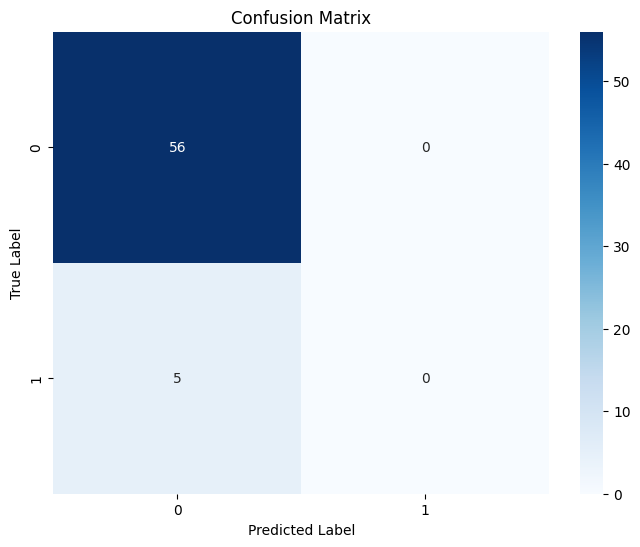

In [31]:
# confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Now Use the same Data for Regression

In [80]:
# move the last column to the end for easier prediction
column_remove = data_final.pop('Selling_Price')

# now insert the column to the end
final_data.insert(len(data_final.columns), 'Selling_Price', column_remove)

final_data.head()

,Year,Present_Price,Kms_Driven,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual,Owner,Selling_Price
0,2014,5.59,27000,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,3.35
1,2013,9.54,43000,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,4.75
2,2017,9.85,6900,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,7.25
3,2011,4.15,5200,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,2.85
4,2014,6.87,42450,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,4.60
